In [1]:
import numpy as np
from matplotlib import pyplot as plt # para mostrar imagens

In [19]:
X = np.array(([0.05, 0.1]), dtype=float)
y = np.array(([0.01, 0.99]), dtype=float)

lrn = 0.05

erros = list() 

In [3]:
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.hiddenSize = 2
        self.outputSize = 2

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)  # (2x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (2x2) weight matrix from hidden to output layer
        
    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1)           # dot product of X (input) and first set of 2x2 weights
        self.z2 = self.sigmoid(self.z)        # activation function
        self.z3 = np.dot(self.z2, self.W2)    # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3)             # final activation function
        return o 
    
    def sigmoid(self, s):
        # activation function 
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error
        # delta_o =  (y - o) * o * (1 - o)

        self.z2_error = self.o_delta.dot(self.W2.T)  # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error
        # delta_z2 = delta_o * w2 * z2 * (1 - z2) = (y - o) * o * (1 - o) * w2 * z2 * (1 - z2)
        
        self.W1 += X.T.dot(self.z2_delta)*lrn      # adjusting first set  (input  --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta)*lrn # adjusting second set (hidden --> output) weights               
        
    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)

Loss: 0.262017646743
Loss: 0.261960879486
Loss: 0.261904401926
Loss: 0.261848212857
Loss: 0.261792311074
Loss: 0.261736695374
Loss: 0.261681364558
Loss: 0.261626317426
Loss: 0.261571552783
Loss: 0.261517069433
Loss: 0.261462866184
Loss: 0.261408941846
Loss: 0.26135529523
Loss: 0.261301925151
Loss: 0.261248830425
Loss: 0.261196009869
Loss: 0.261143462305
Loss: 0.261091186556
Loss: 0.261039181446
Loss: 0.260987445803
Loss: 0.260935978457
Loss: 0.260884778241
Loss: 0.260833843988
Loss: 0.260783174537
Loss: 0.260732768727
Loss: 0.2606826254
Loss: 0.260632743401
Loss: 0.260583121577
Loss: 0.260533758778
Loss: 0.260484653856
Loss: 0.260435805666
Loss: 0.260387213067
Loss: 0.260338874918
Loss: 0.260290790083
Loss: 0.260242957428
Loss: 0.26019537582
Loss: 0.260148044132
Loss: 0.260100961238
Loss: 0.260054126015
Loss: 0.260007537342
Loss: 0.259961194102
Loss: 0.25991509518
Loss: 0.259869239465
Loss: 0.259823625849
Loss: 0.259778253225
Loss: 0.259733120491
Loss: 0.259688226547
Loss: 0.2596435702

Loss: 0.251924645861
Loss: 0.251922898007
Loss: 0.251921159095
Loss: 0.251919429073
Loss: 0.25191770789
Loss: 0.251915995496
Loss: 0.25191429184
Loss: 0.251912596872
Loss: 0.251910910541
Loss: 0.251909232799
Loss: 0.251907563596
Loss: 0.251905902883
Loss: 0.25190425061
Loss: 0.251902606731
Loss: 0.251900971196
Loss: 0.251899343958
Loss: 0.251897724969
Loss: 0.251896114181
Loss: 0.251894511548
Loss: 0.251892917023
Loss: 0.251891330559
Loss: 0.251889752111
Loss: 0.251888181631
Loss: 0.251886619075
Loss: 0.251885064397
Loss: 0.251883517552
Loss: 0.251881978495
Loss: 0.251880447182
Loss: 0.251878923567
Loss: 0.251877407608
Loss: 0.251875899259
Loss: 0.251874398478
Loss: 0.251872905222
Loss: 0.251871419446
Loss: 0.251869941109
Loss: 0.251868470167
Loss: 0.251867006579
Loss: 0.251865550302
Loss: 0.251864101295
Loss: 0.251862659515
Loss: 0.251861224923
Loss: 0.251859797476
Loss: 0.251858377133
Loss: 0.251856963855
Loss: 0.2518555576
Loss: 0.251854158329
Loss: 0.251852766002
Loss: 0.2518513805

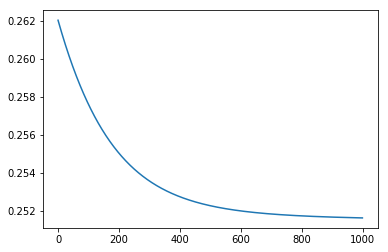

In [22]:
NN = Neural_Network()

for i in range(1000): # trains the NN 100 times
#while(erro > 0.1):
  erro = np.mean(np.square(y - NN.forward(X)))
  print("Loss: " + str(erro)) # mean sum squared loss
  erros.append(erro)
  NN.train(X, y)

plt.plot(erros)
plt.show()
erros = list()